In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Understanding the Brain Tumor MRI Dataset

This code processes a dataset of MRI scans stored in `/kaggle/input/brain-tumor-mri-dataset`. The dataset is organized into two main folders: **Training** and **Testing**. Each folder contains subfolders named after tumor types, such as **glioma**, **meningioma**, **pituitary**, or **notumor**. These subfolders hold image files (e.g., `.jpg` or `.png`) of MRI scans.

The goal is to load these images into a table (called a **DataFrame**) and gather basic information about the dataset, such as the number of images, the distribution of tumor types, and whether any data is missing. This is the first step in understanding the dataset before building a machine learning model to classify brain tumors.

## What Each Part of the Code Does

- **Setting the Path**:
  - The code defines the dataset location using a variable `USER_PATH`.
  - This path points to the dataset folder on **Kaggle**, a platform for data science projects.

- **Loading the Dataset**:
  - A function called `load_dataset` is created to find and organize images. It:
    - Examines the **Training** and **Testing** folders.
    - Checks each tumor type subfolder (e.g., **glioma**) within them.
    - Identifies image files (only those ending in `.jpg`, `.png`, or `.jpeg`).
    - Creates a list where each entry includes:
      - The image’s file path (e.g., `Training/glioma/image1.jpg`).
      - The tumor type (e.g., **glioma**).
      - The split (**Training** or **Testing**).
    - Converts this list into a **DataFrame**, a spreadsheet-like table with columns: `image_path`, `label` (tumor type), and `split` (Training or Testing).

- **Displaying the Data**:
  - After loading, the code prints a confirmation message: "Dataset loaded successfully!"
  - It shows the first five rows of the **DataFrame** to preview the data, including file paths and labels.

- **Calculating Statistics**:
  - The code provides key information about the dataset:
    - **Total Images**: Counts the total number of images.
    - **Class Distribution**: Shows how many images belong to each tumor type (e.g., 1000 **glioma**, 800 **meningioma**). This checks if the dataset is balanced (no tumor type dominates).
    - **Split Distribution**: Counts images in **Training** vs. **Testing**. Training images teach the model, while Testing images evaluate its performance.
    - **Missing Values**: Verifies if any data (e.g., image paths or labels) is missing in the **DataFrame**. Missing data can cause issues, so this ensures the dataset is complete.

In [2]:
# Define dataset path
USER_PATH = r"/kaggle/input/brain-tumor-mri-dataset"

# 1. Load Dataset
def load_dataset(path):
    """Load MRI dataset from Training and Testing folders, extracting image paths and tumor type labels.
    
    Args:
        path (str): Root directory of the dataset.
    
    Returns:
        pd.DataFrame: DataFrame with columns 'image_path', 'label', and 'split'.
    """
    data = []
    # Iterate through Training and Testing folders
    for split in ['Training', 'Testing']:
        split_path = os.path.join(path, split)
        # Iterate through tumor type subfolders (e.g., glioma, meningioma)
        for tumor_type in os.listdir(split_path):
            tumor_path = os.path.join(split_path, tumor_type)
            # Check if the path is a directory
            if os.path.isdir(tumor_path):
                # Iterate through image files in the tumor type folder
                for img_name in os.listdir(tumor_path):
                    # Filter for valid image file extensions
                    if img_name.endswith(('.jpg', '.png', '.jpeg')):
                        data.append({
                            'image_path': os.path.join(tumor_path, img_name),
                            'label': tumor_type,
                            'split': split
                        })
    return pd.DataFrame(data)

# Load dataset and display first few rows
data = load_dataset(USER_PATH)
print("Dataset loaded successfully!")
print(data.head())

# 2. Dataset Statistics
# Display total number of images
print(f"\nTotal images: {len(data)}")

# Display distribution of tumor types
print("\nClass distribution:")
print(data['label'].value_counts())

# Display distribution of Training vs. Testing splits
print("\nSplit distribution:")
print(data['split'].value_counts())

# Check for missing values in the dataset
print("\nMissing values:")
print(data.isnull().sum())

Dataset loaded successfully!
                                          image_path      label     split
0  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
1  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
2  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
3  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training
4  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary  Training

Total images: 7023

Class distribution:
label
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64

Split distribution:
split
Training    5712
Testing     1311
Name: count, dtype: int64

Missing values:
image_path    0
label         0
split         0
dtype: int64


## 2. Image Dimensions Analysis

### Purpose
This section analyzes the dimensions (width and height in pixels) of the MRI images in the dataset. Understanding image dimensions is important to ensure consistency, as machine learning models like ResNet typically require images to have the same size.

### Code Explanation
We extract the dimensions of up to 100 images (or fewer if the dataset is smaller) to check their sizes. This helps identify if all images have the same dimensions or if resizing is needed.

```python
# 3. Image Dimensions (sample up to 100 images or available images)
# Extract dimensions of images for analysis
dimensions = [Image.open(img_path).size for img_path in data['image_path'][:min(100, len(data))]]
print("\nUnique image dimensions:", set(dimensions))

In [3]:
# 3. Image Dimensions (sample up to 100 images or available images)
# Extract dimensions of images for analysis
dimensions = [Image.open(img_path).size for img_path in data['image_path'][:min(100, len(data))]]
print("\nUnique image dimensions:", set(dimensions))


Unique image dimensions: {(1365, 1365), (512, 512), (256, 256)}


## 3. Visualizations

### Chart 1: Class Distribution (Bar Plot)

#### Purpose
This visualization shows the number of MRI images for each tumor type (e.g., glioma, meningioma, pituitary, notumor) in the dataset. It helps identify if the dataset is balanced, meaning each tumor type has a similar number of images, which is important for training a fair machine learning model.

#### Code Explanation
The code creates a bar plot to display the count of images per tumor type using the `seaborn` library, which makes attractive and informative statistical graphics.

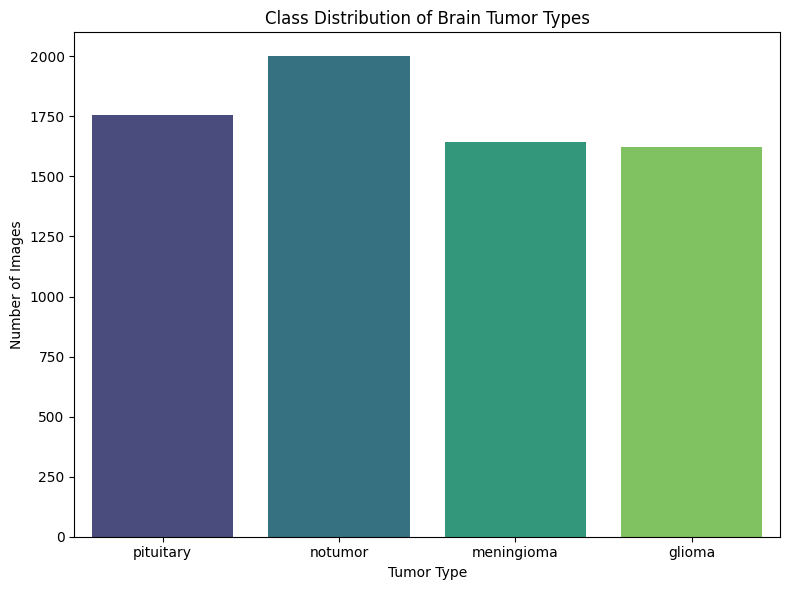

In [4]:
# 4. Visualizations

# Chart 1: Class Distribution (Bar Plot)
# Visualize the number of images per tumor type
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution of Brain Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

### Chart 2: Class Proportion (Pie Chart)

#### Purpose
This visualization displays the proportion of each tumor type (e.g., glioma, meningioma, pituitary, notumor) in the brain tumor MRI dataset as a percentage. A pie chart helps quickly understand the relative contribution of each tumor type to the total dataset, highlighting any imbalances.

#### Code Explanation
The code creates a pie chart using `matplotlib` to show the percentage of images for each tumor type, with colors from the `seaborn` library for clarity.

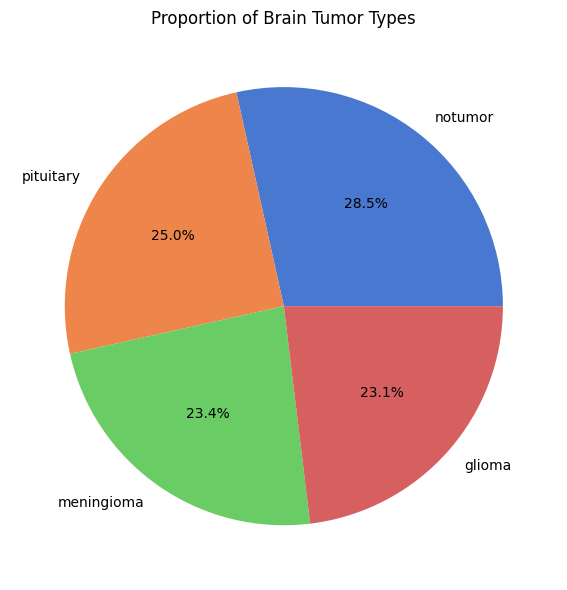

In [5]:
# Chart 2: Class Proportion (Pie Chart)
class_counts = data['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Proportion of Brain Tumor Types')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset path (update as needed)
USER_PATH = r"/kaggle/input/brain-tumor-mri-dataset"

# Custom Dataset Class
class BrainTumorDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.label_map = {'notumor': 0, 'pituitary': 1, 'meningioma': 2, 'glioma': 3}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['image_path']
        label = self.label_map[self.dataframe.iloc[idx]['label']]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# CBAM Module
class CBAM(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super(CBAM, self).__init__()
        # Channel Attention
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc1 = nn.Conv2d(in_channels, in_channels // reduction_ratio, 1)
        self.fc2 = nn.Conv2d(in_channels // reduction_ratio, in_channels, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Spatial Attention
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm2d(1)

    def forward(self, x):
        # Channel attention
        avg_out = self.fc2(self.fc1(self.avg_pool(x)))
        max_out = self.fc2(self.fc1(self.max_pool(x)))
        channel_out = self.sigmoid(avg_out + max_out)
        x = x * channel_out
        
        # Spatial attention
        avg_spatial = torch.mean(x, dim=1, keepdim=True)
        max_spatial, _ = torch.max(x, dim=1, keepdim=True)
        spatial_out = torch.cat([avg_spatial, max_spatial], dim=1)
        spatial_out = self.sigmoid(self.bn(self.conv(spatial_out)))
        x = x * spatial_out
        
        return x

# ResNet with CBAM
class ResNetCBAM(nn.Module):
    def __init__(self, num_classes=4):
        super(ResNetCBAM, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        self.cbam1 = CBAM(256)
        self.cbam2 = CBAM(512)
        self.cbam3 = CBAM(1024)
        self.cbam4 = CBAM(2048)
        
        # Modify ResNet layers to include CBAM
        self.resnet.layer1 = nn.Sequential(self.resnet.layer1, self.cbam1)
        self.resnet.layer2 = nn.Sequential(self.resnet.layer2, self.cbam2)
        self.resnet.layer3 = nn.Sequential(self.resnet.layer3, self.cbam3)
        self.resnet.layer4 = nn.Sequential(self.resnet.layer4, self.cbam4)
        
        # Replace FC layer
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Load Dataset (from your existing code)
def load_dataset(path):
    data = []
    for split in ['Training', 'Testing']:
        split_path = os.path.join(path, split)
        for tumor_type in os.listdir(split_path):
            tumor_path = os.path.join(split_path, tumor_type)
            if os.path.isdir(tumor_path):
                for img_name in os.listdir(tumor_path):
                    if img_name.endswith(('.jpg', '.png', '.jpeg')):
                        data.append({
                            'image_path': os.path.join(tumor_path, img_name),
                            'label': tumor_type,
                            'split': split
                        })
    return pd.DataFrame(data)

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and Split Data
data = load_dataset(USER_PATH)
train_data = data[data['split'] == 'Training']
test_data = data[data['split'] == 'Testing']
train_data, val_data = train_test_split(train_data, test_size=0.2, stratify=train_data['label'], random_state=42)

# Create Datasets
train_dataset = BrainTumorDataset(train_data, transform=train_transform)
val_dataset = BrainTumorDataset(val_data, transform=test_transform)
test_dataset = BrainTumorDataset(test_data, transform=test_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=112, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=112, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=112, shuffle=False)

# Initialize Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNetCBAM(num_classes=4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training Loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        scheduler.step()
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        
        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the Model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler)

# Plot Training Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate on Test Set
def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['notumor', 'pituitary', 'meningioma', 'glioma'], yticklabels=['notumor', 'pituitary', 'meningioma', 'glioma'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(model, test_loader)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 220MB/s]


Epoch 1/20 - Train Loss: 0.3848, Train Acc: 0.8586, Val Loss: 0.3956, Val Acc: 0.8513
Epoch 2/20 - Train Loss: 0.1923, Train Acc: 0.9322, Val Loss: 0.3610, Val Acc: 0.8889
Epoch 3/20 - Train Loss: 0.1126, Train Acc: 0.9630, Val Loss: 0.1702, Val Acc: 0.9414
Epoch 4/20 - Train Loss: 0.1179, Train Acc: 0.9589, Val Loss: 0.3173, Val Acc: 0.8976
Epoch 5/20 - Train Loss: 0.1135, Train Acc: 0.9619, Val Loss: 0.1892, Val Acc: 0.9484
Epoch 6/20 - Train Loss: 0.0863, Train Acc: 0.9685, Val Loss: 0.4064, Val Acc: 0.8985
Epoch 7/20 - Train Loss: 0.0947, Train Acc: 0.9680, Val Loss: 0.1454, Val Acc: 0.9633
Epoch 8/20 - Train Loss: 0.0417, Train Acc: 0.9869, Val Loss: 0.0739, Val Acc: 0.9816
Epoch 9/20 - Train Loss: 0.0241, Train Acc: 0.9937, Val Loss: 0.0721, Val Acc: 0.9825
Epoch 10/20 - Train Loss: 0.0176, Train Acc: 0.9961, Val Loss: 0.0680, Val Acc: 0.9834
Epoch 11/20 - Train Loss: 0.0163, Train Acc: 0.9952, Val Loss: 0.0727, Val Acc: 0.9843
Epoch 12/20 - Train Loss: 0.0130, Train Acc: 0.9972,

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 205MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Epoch 1/20 - Train Loss: 0.5008, Train Acc: 0.8262, Val Loss: 0.9757, Val Acc: 0.6973
Epoch 2/20 - Train Loss: 0.3534, Train Acc: 0.8752, Val Loss: 0.7373, Val Acc: 0.8066
Epoch 3/20 - Train Loss: 0.3013, Train Acc: 0.8906, Val Loss: 0.2861, Val Acc: 0.8950
Epoch 4/20 - Train Loss: 0.2311, Train Acc: 0.9179, Val Loss: 0.4650, Val Acc: 0.8530
Epoch 5/20 - Train Loss: 0.1872, Train Acc: 0.9315, Val Loss: 0.4467, Val Acc: 0.8740
Epoch 6/20 - Train Loss: 0.1701, Train Acc: 0.9418, Val Loss: 0.5066, Val Acc: 0.8696
Epoch 7/20 - Train Loss: 0.1596, Train Acc: 0.9451, Val Loss: 0.2072, Val Acc: 0.9370
Epoch 8/20 - Train Loss: 0.1557, Train Acc: 0.9453, Val Loss: 0.3269, Val Acc: 0.8880
Epoch 9/20 - Train Loss: 0.1311, Train Acc: 0.9543, Val Loss: 0.2162, Val Acc: 0.9344
Epoch 10/20 - Train Loss: 0.1293, Train Acc: 0.9554, Val Loss: 0.2864, Val Acc: 0.9195
Epoch 11/20 - Train Loss: 0.1437, Train Acc: 0.9516, Val Loss: 0.7016, Val Acc: 0.8075
Epoch 12/20 - Train Loss: 0.0858, Train Acc: 0.9718,

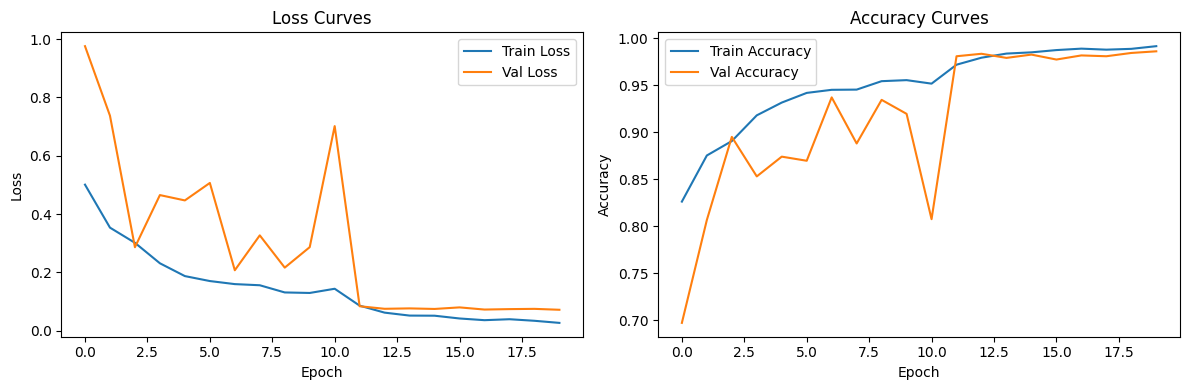

Test Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

     notumor       0.99      0.99      0.99       405
   pituitary       0.98      1.00      0.99       300
  meningioma       0.98      0.96      0.97       306
      glioma       0.99      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



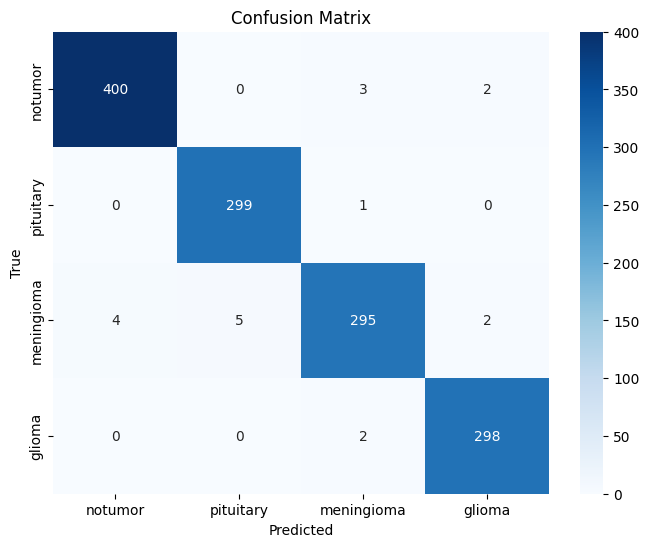

In [1]:
# Import necessary libraries for data handling, image processing, deep learning, and visualization
import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset path (update as needed)
USER_PATH = r"/kaggle/input/brain-tumor-mri-dataset"

# Custom Dataset Class for loading and preprocessing MRI images
class BrainTumorDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        # Initialize dataset with dataframe and optional transforms
        self.dataframe = dataframe
        self.transform = transform
        # Map tumor types to numerical labels
        self.label_map = {'notumor': 0, 'pituitary': 1, 'meningioma': 2, 'glioma': 3}

    def __len__(self):
        # Return the total number of samples
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Load image and label for a given index
        img_path = self.dataframe.iloc[idx]['image_path']
        label = self.label_map[self.dataframe.iloc[idx]['label']]
        image = Image.open(img_path).convert('RGB')
        
        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)
            
        return image, label

# CBAM (Convolutional Block Attention Module) for attention mechanism
class CBAM(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super(CBAM, self).__init__()
        # Channel Attention components
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc1 = nn.Conv2d(in_channels, in_channels // reduction_ratio, 1)
        self.fc2 = nn.Conv2d(in_channels // reduction_ratio, in_channels, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Spatial Attention components
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm2d(1)

    def forward(self, x):
        # Channel attention: compute attention weights using avg and max pooling
        avg_out = self.fc2(self.fc1(self.avg_pool(x)))
        max_out = self.fc2(self.fc1(self.max_pool(x)))
        channel_out = self.sigmoid(avg_out + max_out)
        x = x * channel_out
        
        # Spatial attention: compute attention weights using channel-wise avg and max
        avg_spatial = torch.mean(x, dim=1, keepdim=True)
        max_spatial, _ = torch.max(x, dim=1, keepdim=True)
        spatial_out = torch.cat([avg_spatial, max_spatial], dim=1)
        spatial_out = self.sigmoid(self.bn(self.conv(spatial_out)))
        x = x * spatial_out
        
        return x

# ResNet with CBAM integration for enhanced feature extraction
class ResNetCBAM(nn.Module):
    def __init__(self, num_classes=4):
        super(ResNetCBAM, self).__init__()
        # Load pretrained ResNet50
        self.resnet = models.resnet50(pretrained=True)
        # Initialize CBAM modules for each ResNet layer
        self.cbam1 = CBAM(256)
        self.cbam2 = CBAM(512)
        self.cbam3 = CBAM(1024)
        self.cbam4 = CBAM(2048)
        
        # Add CBAM modules after each ResNet layer
        self.resnet.layer1 = nn.Sequential(self.resnet.layer1, self.cbam1)
        self.resnet.layer2 = nn.Sequential(self.resnet.layer2, self.cbam2)
        self.resnet.layer3 = nn.Sequential(self.resnet.layer3, self.cbam3)
        self.resnet.layer4 = nn.Sequential(self.resnet.layer4, self.cbam4)
        
        # Replace fully connected layer for classification
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        # Forward pass through ResNet with CBAM
        return self.resnet(x)

# Function to load dataset from directory structure
def load_dataset(path):
    data = []
    # Iterate through Training and Testing splits
    for split in ['Training', 'Testing']:
        split_path = os.path.join(path, split)
        # Iterate through tumor types
        for tumor_type in os.listdir(split_path):
            tumor_path = os.path.join(split_path, tumor_type)
            if os.path.isdir(tumor_path):
                # Collect image paths and labels
                for img_name in os.listdir(tumor_path):
                    if img_name.endswith(('.jpg', '.png', '.jpeg')):
                        data.append({
                            'image_path': os.path.join(tumor_path, img_name),
                            'label': tumor_type,
                            'split': split
                        })
    return pd.DataFrame(data)

# Define data preprocessing transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Randomly rotate images by up to 10 degrees
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Load and split dataset into train, validation, and test sets
data = load_dataset(USER_PATH)
train_data = data[data['split'] == 'Training']
test_data = data[data['split'] == 'Testing']
train_data, val_data = train_test_split(train_data, test_size=0.2, stratify=train_data['label'], random_state=42)

# Create dataset instances for PyTorch
train_dataset = BrainTumorDataset(train_data, transform=train_transform)
val_dataset = BrainTumorDataset(val_data, transform=test_transform)
test_dataset = BrainTumorDataset(test_data, transform=test_transform)

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=112, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=112, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=112, shuffle=False)

# Initialize model, loss function, optimizer, and scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Select GPU if available
model = ResNetCBAM(num_classes=4).to(device)  # Initialize model and move to device
criterion = nn.CrossEntropyLoss()  # Define loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Learning rate scheduler

# Training loop function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    train_losses, val_losses = [], []  # Track losses
    train_accuracies, val_accuracies = [], []  # Track accuracies
    
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss, correct, total = 0.0, 0, 0
        
        # Training phase
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()  # Clear gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            running_loss += loss.item()  # Accumulate loss
            _, predicted = torch.max(outputs, 1)  # Get predictions
            total += labels.size(0)  # Update total samples
            correct += (predicted == labels).sum().item()  # Update correct predictions
        
        scheduler.step()  # Update learning rate
        train_loss = running_loss / len(train_loader)  # Average training loss
        train_acc = correct / total  # Training accuracy
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        
        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():  # Disable gradient computation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)  # Average validation loss
        val_acc = correct / total  # Validation accuracy
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        # Print epoch statistics
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler)

# Plot training and validation loss/accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')  # Plot training loss
plt.plot(val_losses, label='Val Loss')  # Plot validation loss
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')  # Plot training accuracy
plt.plot(val_accuracies, label='Val Accuracy')  # Plot validation accuracy
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Function to evaluate model on test set
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    all_preds, all_labels = [], []  # Store predictions and labels
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predictions
            all_preds.extend(predicted.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels
    
    accuracy = accuracy_score(all_labels, all_preds)  # Compute accuracy
    cm = confusion_matrix(all_labels, all_preds)  # Compute confusion matrix
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['notumor', 'pituitary', 'meningioma', 'glioma'], yticklabels=['notumor', 'pituitary', 'meningioma', 'glioma'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate the model on test set
evaluate_model(model, test_loader)